In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

load data from csv file.

In [2]:
train=pd.read_csv('./data/qb.train.csv')

In [3]:
test=pd.read_csv('./data/qb.test.csv')

Method from helper 

In [4]:
def paren_match(row):
    page = row['page']
    text = row['text']
    page = re.sub('[\(|.|\)|,|"|\t]', '', page)
    page = page.split(' ')
    page = [x.lower() for x in page]
    text = re.sub('[\(|.|\)|,|"|\t]', ' ', text)
    text = text.split(' ')
    text = [x.lower() for x in text]
    count = 0
    for item in page:
        if item in text and item not in [' ', 'at', 'a', 'of', 'the', 'on']:
            count += 1
    return count


Data processing from helper

In [5]:
train['paren_match'] = train.apply(paren_match, axis=1)
train['obs_len'] = train['text'].apply(len)

Standarlize

In [6]:
scaler = MinMaxScaler()
train['inlinks'] += 1
train['inlinks_log'] = np.log2(train['inlinks']) 
train[['inlinks_scaled']]  = scaler.fit_transform(train[['inlinks_log']])

print(train.head())


   row  body_score                 page               answer  \
0    1  127.398036  Comus (John Milton)  Comus (John Milton)   
1    2   50.212336                Circe  Comus (John Milton)   
2    3   44.767071                Satyr  Comus (John Milton)   
3    4   44.058274       Philip K. Dick         Wilfred Owen   
4    5   40.675249     Honore de Balzac         Wilfred Owen   

                                                text    category  \
0  First performed in Ludlow Castle by the childr...  Literature   
1  First performed in Ludlow Castle by the childr...  Literature   
2  First performed in Ludlow Castle by the childr...  Literature   
3  This author is convinced by another to publish...  Literature   
4  This author is convinced by another to publish...  Literature   

          tournaments answer_type   corr  inlinks  paren_match  obs_len  \
0  2000 ACF Nationals        work   True       63            2      352   
1  2000 ACF Nationals        None  False        6       

In [7]:
# one hot encoding for categorical variables

#X = pd.get_dummies(X[['category']])
train = pd.get_dummies(train, columns = ['category', 'tournaments', 'answer_type', 
'corr'])
# corr is now corr_True


In [8]:
features = pd.DataFrame(train, columns=['body_score', 'inlinks'])

y = train['corr_True']
#x = train.drop(['corr_True'], axis=1)
x = features



In [9]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(6463, 2) (1616, 2) (6463,) (1616,)


2.a. Try using logistic regression, SVM (multiple kernels), and decision trees. 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

models=[LogisticRegression(),SVC(kernel="linear"),SVC(kernel="poly"),SVC(kernel="rbf"),SVC(kernel="sigmoid"),tree.DecisionTreeClassifier()]
result={}

model= LogisticRegression() acc= 0.6918316831683168


c:\Users\ke012\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


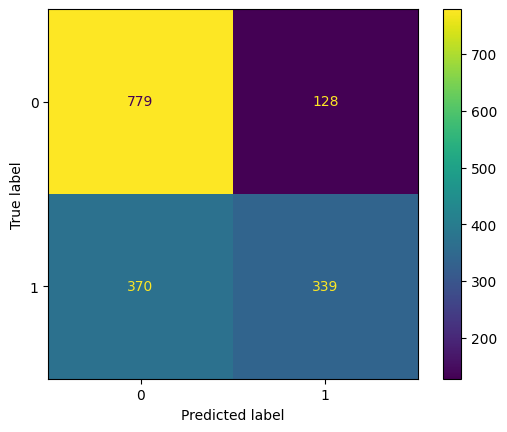

In [11]:
from sklearn.metrics import plot_confusion_matrix
# result={}

x=models[0]
x.fit(train_x, train_y)
pred=x.predict(test_x)
result[x]=accuracy_score(test_y, pred  )
print('model=',x,'acc=',result[x])
plot_confusion_matrix(x, test_x,test_y)  
plt.show()



SVM

model= SVC(kernel='linear') acc= 0.7035891089108911


c:\Users\ke012\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


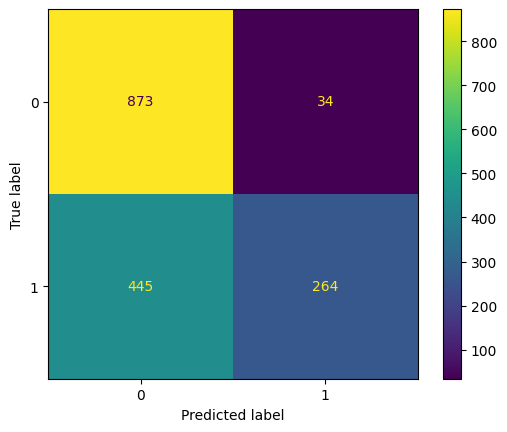

In [12]:
from sklearn.metrics import plot_confusion_matrix

x=models[1]
x.fit(train_x, train_y)
pred=x.predict(test_x)
result[x]=accuracy_score(test_y, pred  )
print('model=',x,'acc=',result[x])
plot_confusion_matrix(x, test_x,test_y)  
plt.show()



model= SVC(kernel='poly') acc= 0.5612623762376238


c:\Users\ke012\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


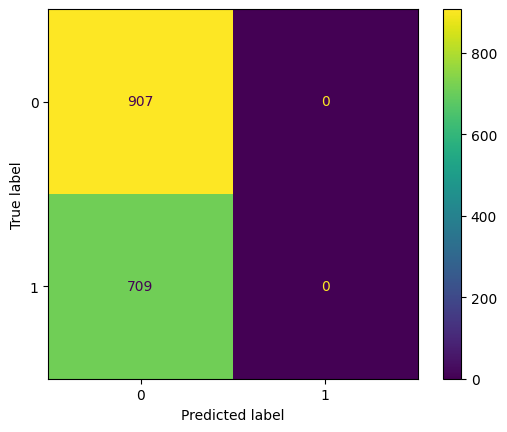

In [13]:
from sklearn.metrics import plot_confusion_matrix


x=models[2]
x.fit(train_x, train_y)
pred=x.predict(test_x)
result[x]=accuracy_score(test_y, pred  )
print('model=',x,'acc=',result[x])
plot_confusion_matrix(x, test_x,test_y)  
plt.show()


model= SVC() acc= 0.6986386138613861


c:\Users\ke012\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


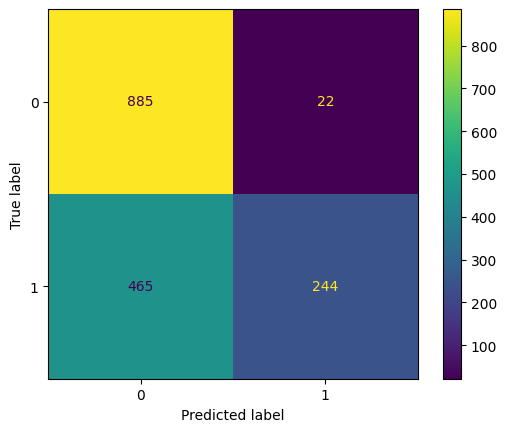

In [14]:
from sklearn.metrics import plot_confusion_matrix

x=models[3]
x.fit(train_x, train_y)
pred=x.predict(test_x)
result[x]=accuracy_score(test_y, pred  )
print('model=',x,'acc=',result[x])
plot_confusion_matrix(x, test_x,test_y)  
plt.show()



model= SVC(kernel='sigmoid') acc= 0.6379950495049505


c:\Users\ke012\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


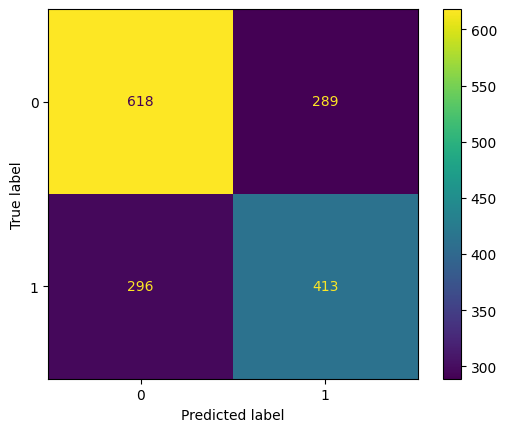

In [15]:
from sklearn.metrics import plot_confusion_matrix


x=models[4]
x.fit(train_x, train_y)
pred=x.predict(test_x)
result[x]=accuracy_score(test_y, pred  )
print('model=',x,'acc=',result[x])
plot_confusion_matrix(x, test_x,test_y)  
plt.show()



model= DecisionTreeClassifier() acc= 0.6862623762376238


c:\Users\ke012\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


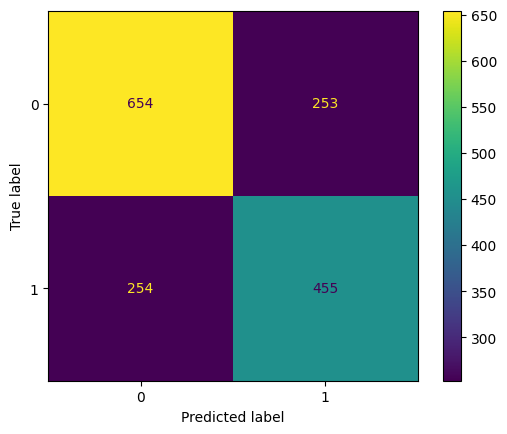

In [16]:
from sklearn.metrics import plot_confusion_matrix


x=models[5]
x.fit(train_x, train_y)
pred=x.predict(test_x)
result[x]=accuracy_score(test_y, pred  )
print('model=',x,'acc=',result[x])
plot_confusion_matrix(x, test_x,test_y)  
plt.show()


In [17]:
result=sorted(result.items(), key=lambda item: item[1],reverse=True)
result

[(SVC(kernel='linear'), 0.7035891089108911),
 (SVC(), 0.6986386138613861),
 (LogisticRegression(), 0.6918316831683168),
 (DecisionTreeClassifier(), 0.6862623762376238),
 (SVC(kernel='sigmoid'), 0.6379950495049505),
 (SVC(kernel='poly'), 0.5612623762376238)]

2.a.  Create a table with your accuracy with each of these methods

In [18]:
results_train=pd.DataFrame({'model':    [i[0]   for i in result],   'acc':[i[1]   for i in result]})
results_train

,model,acc
0,SVC(kernel='linear'),0.703589
1,SVC(),0.698639
2,LogisticRegression(),0.691832
3,DecisionTreeClassifier(),0.686262
4,SVC(kernel='sigmoid'),0.637995
5,SVC(kernel='poly'),0.561262


In [19]:
# test_y.groupby()
c=(test_y.to_frame())
c=c.groupby(['corr_True']).size()
c

corr_True
0    907
1    709
dtype: int64

2.b. Look at where you’re making mistakes. Can you see any patterns?

From the confusion matrixs above, the modles are guessing 0 most of the time; whereas, we can see form the ratio in test_y, the ratio between 1 and 0 is not that inbalenced.
label   count
0       907
1       709

Find additional information you can use to improve predictions. Be creative. Look for features you can extract from the data that you have.
 NOTE: To get credit for this, you need to have an idea and evaluate it. You will get full credit for a well-thought out feature that doesn’t improve performance.

In [20]:
train.describe()

,row,body_score,inlinks,paren_match,obs_len,inlinks_log,inlinks_scaled,category_Literature,tournaments_1999 ACF Nationals,tournaments_1999 ACF Regionals,...,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,answer_type_people,answer_type_place,answer_type_work,corr_False,corr_True
count,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.0,8079.000000,8079.000000,...,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000
mean,6925.462805,58.712909,71.683253,0.205223,409.571482,4.008690,0.260335,1.0,0.013863,0.020547,...,0.005694,0.002352,0.036267,0.002352,0.008417,0.377646,0.008788,0.358336,0.554277,0.445723
std,4010.872917,40.023035,541.807126,0.490027,214.371700,2.315134,0.150351,0.0,0.116930,0.141871,...,0.075247,0.048441,0.186965,0.048441,0.091362,0.484828,0.093338,0.479541,0.497076,0.497076
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3500.500000,32.073499,5.000000,0.000000,225.000000,2.321928,0.150792,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6905.000000,49.067585,16.000000,0.000000,393.000000,4.000000,0.259771,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,10370.500000,71.922447,46.000000,0.000000,574.000000,5.523562,0.358715,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,13924.000000,359.077342,43183.000000,5.000000,1200.000000,15.398176,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 98 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   row                                                      8079 non-null   int64  
 1   body_score                                               8079 non-null   float64
 2   page                                                     8079 non-null   object 
 3   answer                                                   8079 non-null   object 
 4   text                                                     8079 non-null   object 
 5   inlinks                                                  8079 non-null   int64  
 6   paren_match                                              8079 non-null   int64  
 7   obs_len                                                  8079 non-null   int64  
 8   inlinks_log                 

Revise the paren_match function to add more preposition.


In [22]:
def paren_match_after(row):
    page = row['page']
    text = row['text']
    page = re.sub('[\(|.|\)|,|"|\t]', '', page)
    page = page.split(' ')
    page = [x.lower() for x in page]
    text = re.sub('[\(|.|\)|,|"|\t]', ' ', text)
    text = text.split(' ')
    text = [x.lower() for x in text]
    count = 0
    for item in page:
        if item in text and item not in [' ', 'at', 'a', 'of', 'the', 'on','by','for','from','under','without','in','without','within','an','it','is','are','for']:
            count += 1
    return count

In [23]:
train_after = pd.read_csv("./data/qb.train.csv")
train_after['paren_match'] = train_after.apply(paren_match_after, axis=1)
train_after['obs_len'] = train_after['text'].apply(len)
scaler = MinMaxScaler()
train_after['inlinks'] += 1
train_after['inlinks_log'] = np.log2(train_after['inlinks']) 
train_after[['inlinks_scaled']]  = scaler.fit_transform(train_after[['inlinks_log']])

# train_after

Try label encoding for 'category', 'tournaments', 'answer_type'.

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column


Deal with unseen value.

In [25]:
all=pd.concat(  [test,train_after]    )


In [26]:
category_list=['Literature']
tournaments_list=list(set(all['tournaments']))
answer_type_list=list(set(all['answer_type']))

cat_label=LabelEncoder().fit(category_list)
tour_label=LabelEncoder().fit(tournaments_list)
aws_label=LabelEncoder().fit(answer_type_list)


In [27]:
'2000 ACF Nationals' in tournaments_list

True

In [28]:
train_after['category'] = cat_label.transform(train_after['category'])
train_after['tournaments'] = tour_label.transform(train_after['tournaments'])
train_after['answer_type'] = aws_label.transform(train_after['answer_type'])
train_after = pd.get_dummies(train_after, columns = ['corr'])

train_after

,row,body_score,page,answer,text,category,tournaments,answer_type,inlinks,paren_match,obs_len,inlinks_log,inlinks_scaled,corr_False,corr_True
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,0,2,8,63,2,352,5.977280,0.388181,0,1
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,0,2,0,6,1,352,2.584963,0.167875,1,0
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,0,2,0,7,0,352,2.807355,0.182317,1,0
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,0,67,6,23,0,327,4.523562,0.293773,1,0
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,0,67,0,1,0,327,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074,13920,51.072087,Lord Peter Wimsey,Snow Country,The author of this work later released a short...,0,68,8,4,0,461,2.000000,0.129886,1,0
8075,13921,42.298305,Satires (Juvenal),Kaddish (poem),The subject of this poem finds refuge from Tro...,0,68,0,19,0,347,4.247928,0.275872,1,0
8076,13922,40.570231,Kubla Khan,Kaddish (poem),The subject of this poem finds refuge from Tro...,0,68,0,9,0,347,3.169925,0.205864,1,0
8077,13923,37.679422,Asgard,Kaddish (poem),The subject of this poem finds refuge from Tro...,0,68,1,10,0,347,3.321928,0.215735,1,0


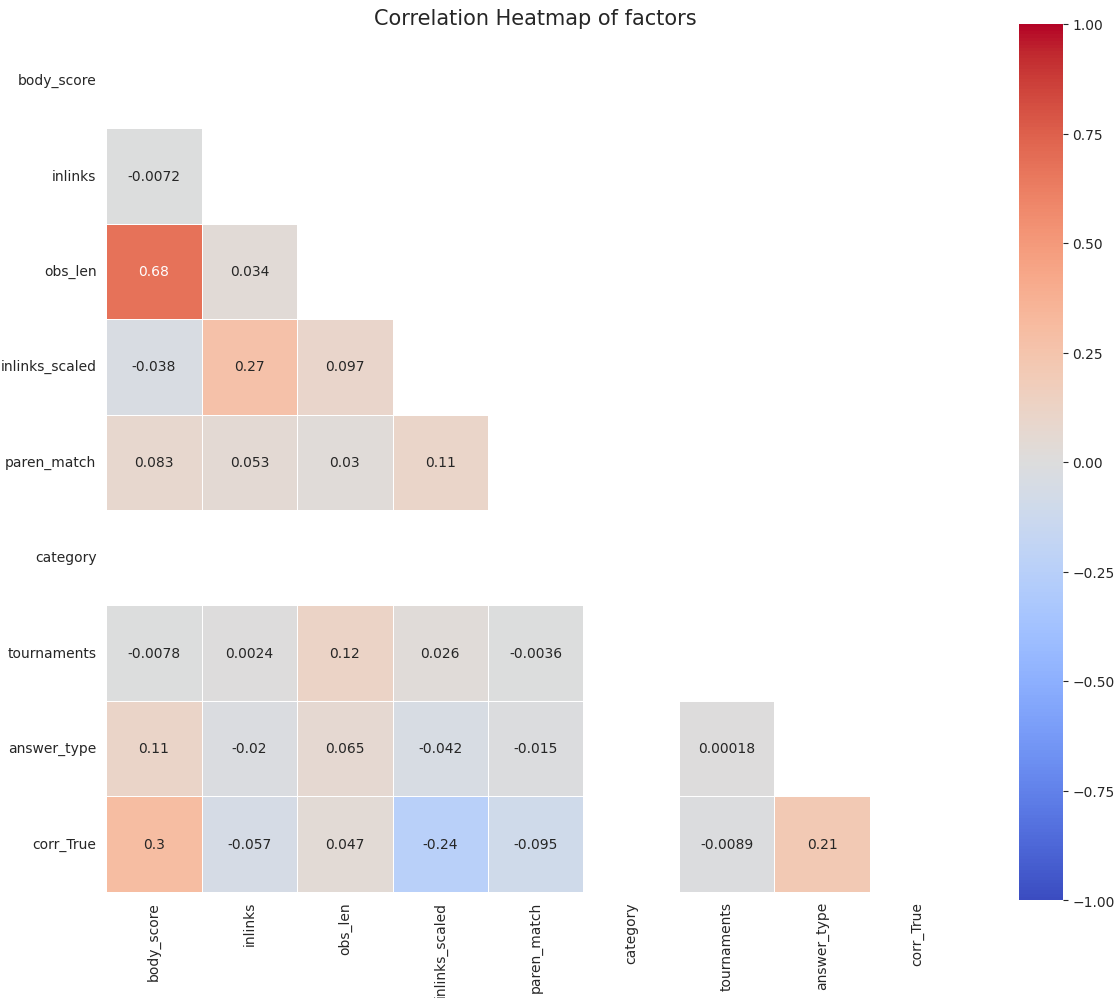

In [29]:
df_corr = train_after[   ['body_score','inlinks','obs_len','inlinks_scaled','paren_match','category','tournaments','answer_type','corr_True']  ].corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(df_corr, mask=mask, vmax=1, vmin=-1, linewidths=.5, square=True, cmap='coolwarm', annot=True)
    plt.title('Correlation Heatmap of factors', fontsize = 15)
    plt.yticks(rotation=0)
    plt.tight_layout()

In [30]:
features_after = pd.DataFrame(train_after, columns=['body_score', 'inlinks_scaled','answer_type','paren_match','obs_len','tournaments'])
y_after = train['corr_True']
#x = train.drop(['corr_True'], axis=1)
x_after = features_after
x_after


,body_score,inlinks_scaled,answer_type,paren_match,obs_len,tournaments
0,127.398036,0.388181,8,2,352,2
1,50.212336,0.167875,0,1,352,2
2,44.767071,0.182317,0,0,352,2
3,44.058274,0.293773,6,0,327,67
4,40.675249,0.000000,0,0,327,67
...,...,...,...,...,...,...
8074,51.072087,0.129886,8,0,461,68
8075,42.298305,0.275872,0,0,347,68
8076,40.570231,0.205864,0,0,347,68
8077,37.679422,0.215735,1,0,347,68


we can see from the matrix, the columns 'body_score', 'inlinks_scaled','obs_len' are more realted to the answer, so I tried to add it to the train_x.

In [31]:
train_x_after, test_x_after, train_y_after, test_y_after = train_test_split(x_after, y_after, test_size=0.2,random_state=1)
print(train_x_after.shape, test_x_after.shape, train_y_after.shape, test_y_after.shape)

(6463, 6) (1616, 6) (6463,) (1616,)


From the past, the best model is SVC(kernel='linear').

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
models=[LogisticRegression(),SVC(kernel="linear"),SVC(kernel="poly"),SVC(kernel="rbf"),SVC(kernel="sigmoid"),tree.DecisionTreeClassifier()]
result_after={}
best_model=None
best_score=0




In [33]:
for x in models:
    x.fit(train_x_after, train_y_after)
    pred_after=x.predict(test_x_after)
    acc=accuracy_score(test_y_after, pred_after  )
    if acc>best_score: 
        best_score=acc
        best_model=x
    result_after[x]=acc
    print('model=',x,'acc=',acc)
    

model= LogisticRegression() acc= 0.719059405940594


3.a. Create a plot that explains why this information is useful for making predictions (e.g. create a facet graph showing the distribution for correct and incorrect). Turn this in as “plot.pdf”.

In [ ]:
result_after=sorted(result_after.items(), key=lambda item: item[1],reverse=True)
result_after


We can compare with the model we got at first.

In [ ]:
print(  results_train.iloc[0] )


In [ ]:
print('best accuracy',best_score)
plot_confusion_matrix(best_model, test_x_after,test_y_after)  
plt.show()

In [ ]:
from sklearn import tree
# get roc curve
max_depths = np.linspace(1, 30, 30, dtype = int,endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = tree.DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(train_x_after, train_y_after)
   train_pred = dt.predict(test_x_after)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y_after, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(test_x_after)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y_after, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1= plt.plot(max_depths, train_results, "b", label="Train AUC")
line2= plt.plot(max_depths, test_results, "r", label="Test AUC")

plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

In [ ]:
best_model= tree.DecisionTreeClassifier(max_depth=10)
best_model.fit(train_x_after, train_y_after)
pred_after=best_model.predict(test_x_after)


In [ ]:
acc=accuracy_score(test_y_after, pred_after  )
acc

3.b. How much does this feature improve your classification?

We got an imporve from 70 to 80.

4.Challenge: Build a classifier that best predicts correct answers in this dataset. Upload your predictions to Kaggle. (note that you must use your UMD e-mail to get access to this competition). If your UMD username is JSMITH, use JSMITH_DID as your username on Kaggle. You are welcome to use any additional data you care to use
so long as they are not from quiz bowl questions.

In [ ]:
def paren_match_after(row):
    page = row['page']
    text = row['text']
    page = re.sub('[\(|.|\)|,|"|\t]', '', page)
    page = page.split(' ')
    page = [x.lower() for x in page]
    text = re.sub('[\(|.|\)|,|"|\t]', ' ', text)
    text = text.split(' ')
    text = [x.lower() for x in text]
    count = 0
    for item in page:
        if item in text and item not in [' ', 'at', 'a', 'of', 'the', 'on','by','for','from','under','without','in','without','within','an','it','is','are','for']:
            count += 1
    return count

In [ ]:
test = pd.read_csv("./data/qb.test.csv")
test.head()

# train_after

In [ ]:
test['paren_match'] = test.apply(paren_match_after, axis=1)
test['obs_len'] = test['text'].apply(len)
scaler = MinMaxScaler()
test['inlinks'] += 1
test['inlinks_log'] = np.log2(test['inlinks']) 
test[['inlinks_scaled']]  = scaler.fit_transform(test[['inlinks_log']])

In [ ]:

# Assigning numerical values and storing in another column
test['category'] = cat_label.transform(test['category'])
test['tournaments'] = tour_label.transform(test['tournaments'])
test['answer_type'] = aws_label.transform(test['answer_type'])

test

In [ ]:
features_after = pd.DataFrame(test, columns=['body_score', 'inlinks_scaled','answer_type','paren_match','obs_len','tournaments'])
#x = train.drop(['corr_True'], axis=1)
test_x = features_after
test_x


In [ ]:
pre=best_model.predict(test_x)
pre = pre.astype(dtype=bool)
pre
    

In [ ]:
output = pd.DataFrame({
                        "row":test['row'],
                        "corr": pre
                        })
output.to_csv('submission'+str(best_model)+'.csv', index=False, header = 1)
print("Your submission for ",str(best_model),"was successfully saved!")

In [ ]:
pre.astype(bool)  

4.a. Provide your final score and username

User Name:KCHOU1_DID
Score:0.78064

4.b. Create an error analysis of your final classifier. Turn this in as “error.pdf”. An error analysis must contain real examples of your data, not just an error
matrix.

A good error analysis must contain examples from the development set that you get wrong. You should show those sentences and explain why (in terms of features or the model) they have the wrong answer.
You should have been doing this all along as your derive new features (e.g., 2b), but this is your final inspection of your errors. The feature or model problems you discover should not be trivial features you could add easily. Instead, these should be features or models that are difficult to correct.
An error analysis is not the same thing as simply presenting the error matrix, as it
does not inspect any individual examples.

use XOR to get the ones that got predicted incorrectly.

In [ ]:
pred_y=best_model.predict(test_x_after)
xor_mask=np.logical_xor(pred_y,test_y_after).reset_index()
xor_mask=xor_mask['corr_True']


In [ ]:
xor_mask=list(xor_mask)
xor_mask

In [ ]:
from collections import Counter
Counter(xor_mask)

In [ ]:
pd.DataFrame(pred_y).loc[xor_mask].head()

In [ ]:
test_x_after

In [ ]:
p=best_model.predict(test_x_after)
p=p[xor_mask]
aws=test_y_after[xor_mask]
aws

In [ ]:
error=test_x_after.loc[xor_mask]
error['aws']=aws
error['predicted_val']=p
error

In [ ]:
data=test_x_after.groupby('answer_type').count().reset_index()
def get_count(x):
    return int(data.loc[data['answer_type'] == x]['body_score'])

In [ ]:
error_c=error.groupby('answer_type').count().reset_index()
error_c=error_c[['answer_type','body_score']]
error_c=error_c.rename(columns={"body_score": 'count'})
error_c=error_c.sort_values(by=['count'],ascending=False)
error_c['answer_type_by_catagory']=aws_label.inverse_transform(error_c['answer_type'])
error_c['all_count']=error_c['answer_type'].apply(get_count)
error_c['error_percentage']=error_c['count']/error_c['all_count']
error_c=error_c.sort_values(by=['error_percentage'],ascending=False)
error_c



In [ ]:
test_x_after.iloc[1,2]